Analysis of Ad-Hoc Communications Network

The aim of this project is to come up a algorism to maximize the coverage area of random communications tower. Every tower provides a rectangular area of service. No tower can fully cover the interest area, and no individual rectangular subsection can provides the overlapped area at the same time. 

We are asked to solve the following problems:

● Given an overall desired coverage footprint and a sequence of  n communications towers, what is the resulting resolved coverage?
 
● What is the total area of coverage relative to the desired total coverage area of the original footprint? That is, are there any gaps in coverage?

● On average, how many communications towers are required before full coverage is obtained?


References:

1.http://matthiaseisen.com/pp/patterns/p0203/

2.https://www.geeksforgeeks.org/maximum-size-rectangle-binary-sub-matrix-1s/

3.https://www.geeksforgeeks.org/count-number-of-squares-in-a-rectangle/

4.https://www.youtube.com/watch?v=g8bSdXCG-lA

5.https://tech.pic-collage.com/algorithm-largest-area-in-histogram-84cc70500f0c

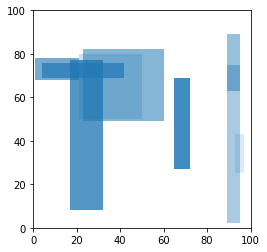

In [64]:
def drawing(xwidth, ywidth,n):
    '''
    the function return the matplotlib.subplot
    all inputs must be integer based
    '''
    assert isinstance(xwidth,int)
    assert isinstance(ywidth,int)
    assert xwidth,ywidth > 0
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches
    import random as rd
    import numpy as mp
    import pandas as pd
    
    rd.seed()                                # seeding a pseudo-random number generator to get first "previous" value
    fig = plt.figure()
    ax = fig.add_subplot(111, aspect='equal')
    ax.set_xlim([0, xwidth])                 # set x-axis limit of background area
    ax.set_ylim([0, ywidth])                 # set x-axis limit of background area
    
    for i in range(1,n+1):
        s_x, s_y = rd.randint(0,xwidth-1), rd.randint(0,ywidth-1)
        e_x, e_y = rd.randint(s_x,xwidth), rd.randint(s_y, ywidth)
        ax.add_patch(patches.Rectangle((s_x, s_y), e_x-s_x, e_y-s_y, alpha=(i+1)/float(n+3) )) 
    return ax

# visualization of random overlapping tower base
# <Example:> xwidth, ywidth = 100, 100 and 10 random towers
drawing (100, 100, 10)
# According to the Ad-Hoc communication model, no overlap between two respective towers.


In [65]:
class it(type):
    # create an class it to use iteration in classes
    def __iter__(self):
        return self.classiter()

    
class Point(object):
    # Point define the rectangle position
    __metaclass__ = it
    by_id = {}
    def __init__(self, x, y):
        self.x = x
        self.y = y
    @classmethod
    def classiter(cls):
        return iter(cls.by_id.values())


class Rect(object):
    # Use Rect class to build up rectangles
    __metaclass__ = it
    by_id = {}
    def __init__(self, p1, p2):
        
        self.left   = min(p1.x, p2.x)
        self.right  = max(p1.x, p2.x)
        self.bottom = min(p1.y, p2.y)
        self.top    = max(p1.y, p2.y)
    @classmethod
    def classiter(cls):
        return iter(cls.by_id.values())
    


In [66]:
'''
Create several functions to implement into the codes
'''

def overlap(r1,r2):
    # define whether the rectangles are overlapped
    # If overlapped, returen True
    # Else, return False
    
    h_overlaps, v_overlaps = False, False
    if (r1.left > r2.right) or (r1.right < r2.left):
        h_overlaps = True
    if (r1.top <  r2.bottom) or (r1.bottom > r2.top):
        v_overlaps = True
    return h_overlaps and v_overlaps


def draw_towers(inputlist, xwidth, ywidth, n):
    '''
    Define a function to draw final optimized non-overlapped towers range
    Return a matplotlib.subplot figure
    '''
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches
    
    fig = plt.figure()
    ax = fig.add_subplot(111, aspect='equal')
    ax.set_xlim([0, xwidth])
    ax.set_ylim([0, ywidth])
    
    for rect in inputlist:
        s_x, s_y = rect.left, rect.bottom
        e_x, e_y = rect.right, rect.top
        ax.add_patch(patches.Rectangle((s_x, s_y), e_x-s_x, e_y-s_y, alpha=0.5 )) 
    return ax

def coverage_after_n(inputlist, xwidth, ywidth, n):
    '''
    Calculate the total coverage area of tower service space
    Returns 1 and 0 stands for covered area and non-covered area
    '''
    import numpy as np
    background = np.zeros((xwidth, ywidth))
    set_list = []
    for rect in inputlist:
        s_x, s_y = rect.left, rect.bottom
        e_x, e_y = rect.right, rect.top
        settt = np.zeros((xwidth, ywidth))
        for i in range(ywidth - e_y, ywidth - s_y):         # mapping each tower cover area.element to 1s
            for j in range(s_x, e_x):
                settt[i,j] = 1
                set_list.append(settt)
    cover_area = np.sum((set_list)>0)
    total_area = xwidth*ywidth
    coverage = cover_area/float(total_area)
    return coverage

def maxrectangle(givenlist):
    '''
    Calculate the maximum area in given list 
    return the max value in given list
    '''
    maxArea = 0
    size = len(givenlist)
    for i in range(size):
        minH = givenlist[i]
        for j in reversed(range(i)):
            if givenlist[j] == 0:
                break
            minH = min(minH, givenlist[j])
            area = minH * (i-j+1)
            maxArea = max(maxArea, area)
    return maxArea

In [104]:


################################################
### input xwidth, ywidth to setup background ###
xwidth = 100
ywidth = 100
n = 5
################################################


import numpy as np
rect_list = []
sortedmat = []
maxlist = []
background = np.zeros((xwidth, ywidth))
for count in range(n):
    import random as rd
    rd.seed()
    s_x, s_y = rd.randint(0,xwidth-1), rd.randint(0,ywidth-1)   # random position
    e_x, e_y = rd.randint(s_x,xwidth), rd.randint(s_y, ywidth)  # random size 
    a = Point(s_x,s_y)                                          # Stor in Point class
    b = Point(e_x,e_y)
    newrect = Rect(a,b)                                         # Store in Rect class
    
    if count <1:
        rect_list.append(newrect)
    else:
        for oldrect in rect_list:
            if overlap(oldrect, newrect):
                s_x, s_y = newrect.left, newrect.bottom
                e_x, e_y = newrect.right, newrect.top
                setting = np.zeros((xwidth, ywidth))
                
                for i in range(ywidth - e_y, ywidth - s_y):
                    for j in range(s_x, e_x):
                        setting[i,j] = 1                         # set all 1s matrix for new generated rectangle
                
                o_x, o_y = int(oldrect.left), int(oldrect.bottom)
                o_xx, o_yy = int(oldrect.right), int(oldrect.top)
                oldrect = np.zeros((xwidth, ywidth))
                for i in range(ywidth - o_yy, ywidth - o_y):
                    for j in range(o_x, o_xx):
                        oldrect[i,j] = 1        
                
                plus = setting + oldrect                        # add up the two rectangulars with 1s&0s
                import numpy.ma as ma                           # import numpy mask
                
                mx = ma.masked_equal(plus,2)
                mx.mask = ma.nomask                             # remove mask
                sub = setting*mx                                # overlapped area
                rest = plus - sub                               
                ttt = np.array(rest)                            # 2 add up rectangles minus overlapped area
                tmat = ttt.tolist()
    
                '''
                After trimmed the overlapped area of the random rectangular
                we have a trimmed multi right angle shape
                Now using the idea of Largest Rectangle in Histogram to solve the problem
                '''
                
                for row in tmat:
                    for col in row:
                        if tmat[tmat.index(row)][row.index(col)] == 1:
                            tmat[tmat.index(row)][row.index(col)] += tmat[tmat.index(row)-1][row.index(col)]
                            maxlist.append(maxrectangle(tmat[tmat.index(row)]))
                        else:
                            tmat[tmat.index(row)][row.index(col)] = 0
                    sortedmat.append(row)
                    
                if maxlist !=[]:                                          # exlude total covered case
                    for row in sortedmat:
                        sum_row = sum(row)
                        mmm = max(maxlist)
                        if sum_row == mmm:
                            nonzero = np.nonzero(row)[0]
                            nonzero.tolist()
                            pos_x = min(nonzero)                             # x position of nonzero element
                            pos_y = len(sortedmat) - sortedmat.index(row)-1  # y position of nonzero element
                            pos_xx = pos_x + len(nonzero)                    # diagonal x point
                            pos_yy = pos_y + (max(maxlist)/len(nonzero))     #diagonal y point
                            a = Point(pos_x, pos_y)
                            b = Point(pos_xx, pos_yy)
                            trimmed_rect = Rect(a,b)
                            rect_list.append(trimmed_rect)
                else:
                    rect_list.append(newrect)

draw_towers(rect_list,xwidth,ywidth,n)                    

IndexError: index -169 is out of bounds for axis 0 with size 100